## Import modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
sns.set_palette('muted')

## Loading dataset

In [44]:
df = pd.read_csv('Mental_Health_and_Social_Media_Balance.csv')
df.head()

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0
3,U004,36,Female,5.7,7.0,8.0,1.0,1.0,TikTok,8.0
4,U005,34,Female,7.0,4.0,7.0,5.0,1.0,X (Twitter),8.0


## Preprocessing

In [45]:
#Dropping the User_ID column, since it is not relevant to our analysis
df = df.drop('User_ID', axis=1)

In [46]:
#Reducing all column names and categorical features to lowercase and removing spaces
df.columns = df.columns.str.lower().str.replace(' ', '_')
cols = list(df.dtypes[df.dtypes == 'object'].index)
for col in cols:
    df[col] = df[col].str.lower().str.replace(' ', '_')
df = df.rename(columns={'sleep_quality(1-10)':'sleep_quality',
                        'stress_level(1-10)':'stress_level',
                        'happiness_index(1-10)':'happiness_index'})

In [47]:
#Converting categorical variables into the 'category' type
for col in ['gender', 'social_media_platform']:
    df[col] = df[col].astype('category')
df['exercise_frequency(week)'] = df['exercise_frequency(week)'].astype('int')

## Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   age                        500 non-null    int64   
 1   gender                     500 non-null    category
 2   daily_screen_time(hrs)     500 non-null    float64 
 3   sleep_quality              500 non-null    float64 
 4   stress_level               500 non-null    float64 
 5   days_without_social_media  500 non-null    float64 
 6   exercise_frequency(week)   500 non-null    int64   
 7   social_media_platform      500 non-null    category
 8   happiness_index            500 non-null    float64 
dtypes: category(2), float64(5), int64(2)
memory usage: 28.8 KB


In [7]:
#Checking for null values
df.isnull().sum()

age                          0
gender                       0
daily_screen_time(hrs)       0
sleep_quality                0
stress_level                 0
days_without_social_media    0
exercise_frequency(week)     0
social_media_platform        0
happiness_index              0
dtype: int64

In [8]:
#Checking for duplicated rows
print('Number of duplicated rows: ', df.duplicated().sum())

Number of duplicated rows:  0


In [9]:
df.describe()

,age,daily_screen_time(hrs),sleep_quality,stress_level,days_without_social_media,exercise_frequency(week),happiness_index
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,32.988000,5.530000,6.304000,6.618000,3.134000,2.448000,8.376000
std,9.960637,1.734877,1.529792,1.542996,1.858751,1.428067,1.524228
min,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,4.000000
25%,24.000000,4.300000,5.000000,6.000000,2.000000,1.000000,7.000000
50%,34.000000,5.600000,6.000000,7.000000,3.000000,2.000000,9.000000
75%,41.000000,6.700000,7.000000,8.000000,5.000000,3.000000,10.000000
max,49.000000,10.800000,10.000000,10.000000,9.000000,7.000000,10.000000


In [47]:
#Taking a look at unique values for categorical columns
for col in df.columns:
    if df[col].dtype=='category':
        print('Column name: ', col)
        print('Number of unique values: ',df[col].nunique())
        print('All unique values: ', df[col].unique())
        print('\n')

Column name:  gender
Number of unique values:  3
All unique values:  ['male', 'other', 'female']
Categories (3, object): ['female', 'male', 'other']


Column name:  social_media_platform
Number of unique values:  6
All unique values:  ['facebook', 'linkedin', 'youtube', 'tiktok', 'x_(twitter)', 'instagram']
Categories (6, object): ['facebook', 'instagram', 'linkedin', 'tiktok', 'x_(twitter)', 'youtube']




In [54]:
# Define some custom functions for plotting
def category_plot(data):
    '''
    Creates a count plot for each categorical column in the input DataFrame.
    Args: 
        data (DataFrame): input DataFrame containing solely categorical columns.
    Output:
        None: prints plots using seaborn
    '''

    fig, axes = plt.subplots(1, 2, figsize=(18, 5))
    fig.suptitle(f'Frequency Analysis', fontsize=20)
    for i, col in enumerate(data.columns):
        column = i % 2
        sns.countplot(x = data[col], ax=axes[column], hue=data[col], palette='Set2', legend=False)
        axes[column].set_title(f'{col} Frequency', fontsize=17)
    plt.show()


def numerical_plot(data, num_bins):
    '''
    Creates a histogram and a box plot for each column in the input DataFrame.
    Args: 
        data (DataFrame): input DataFrame containing solely numerical columns.
    Output:
        None: prints plots using seaborn
    '''

    for i, col in enumerate(data.columns):
        fig, axes = plt.subplots(1, 2, figsize=(18, 5))
        fig.suptitle(f'Analysis of {col}', fontsize = 20)
        #Count
        n_bins = num_bins[i]
        sns.histplot(data[col], ax=axes[0], bins = n_bins)
        axes[0].set_title(f'{col} Histogram', fontsize=14)
        axes[0].set_xlabel(col, fontsize=12)
        axes[0].set_ylabel('Frequency', fontsize=12)
        #Box plot
        sns.boxplot(x=data[col], ax=axes[1])
        axes[1].set_title(f'{col} Box Plot', fontsize=14)
        axes[1].set_ylabel(col, fontsize=12)
        skew = stats.skew(data[col])
        print(f'Skewness of the data in {col} is: ', skew)
        plt.show()

In [12]:
#Separating categorical and numerical columns
cat_cols = []
num_cols = []
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        num_cols.append(col)
    else:
        cat_cols.append(col)

Skewness of the data in age is:  -0.121476260135202


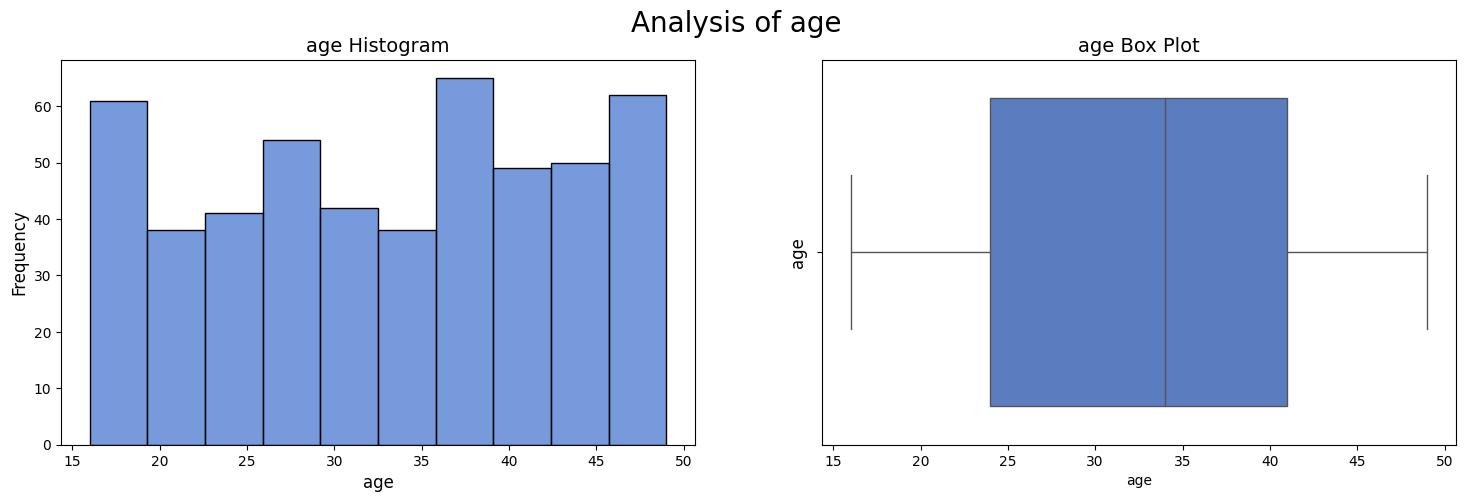

Skewness of the data in daily_screen_time(hrs) is:  0.0345811797007431


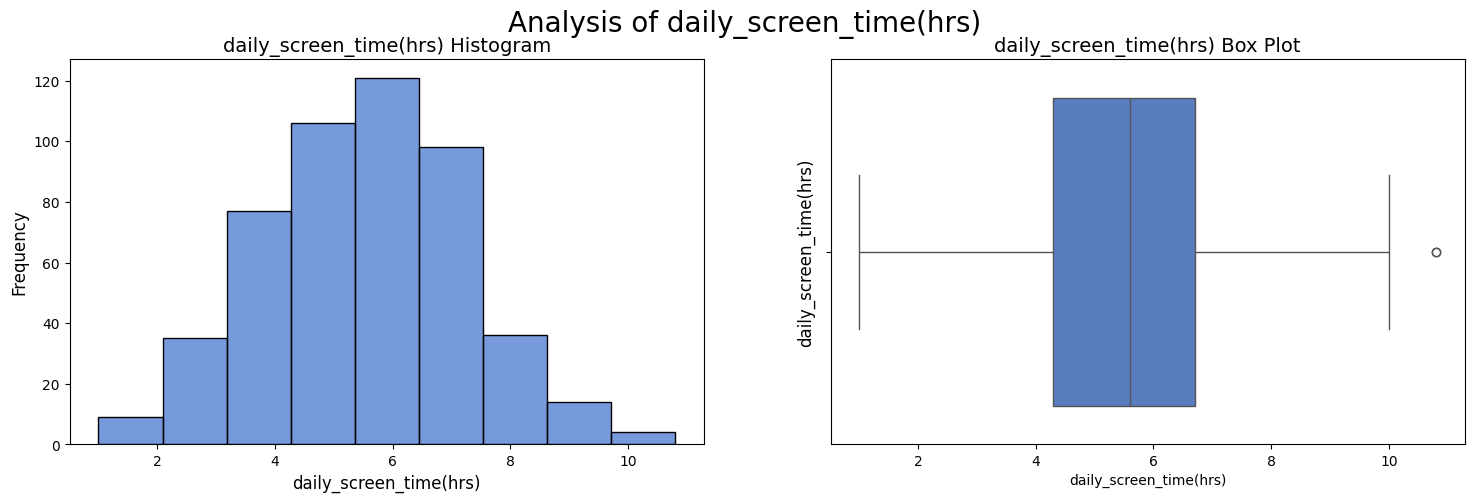

Skewness of the data in sleep_quality is:  0.031897082880453446


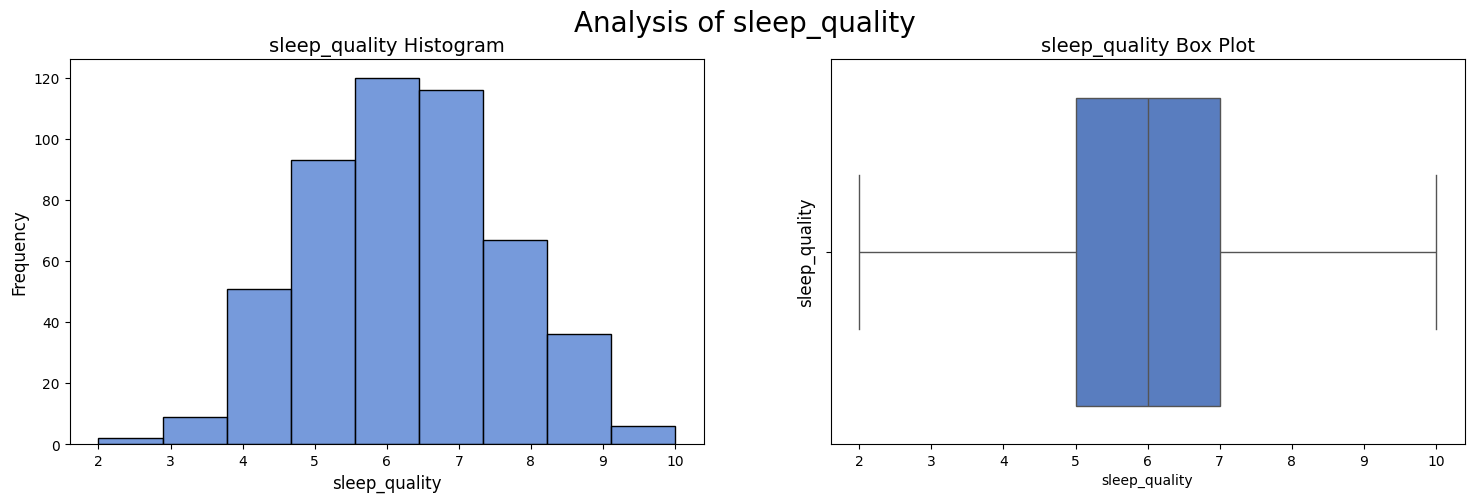

Skewness of the data in stress_level is:  -0.09263177919079675


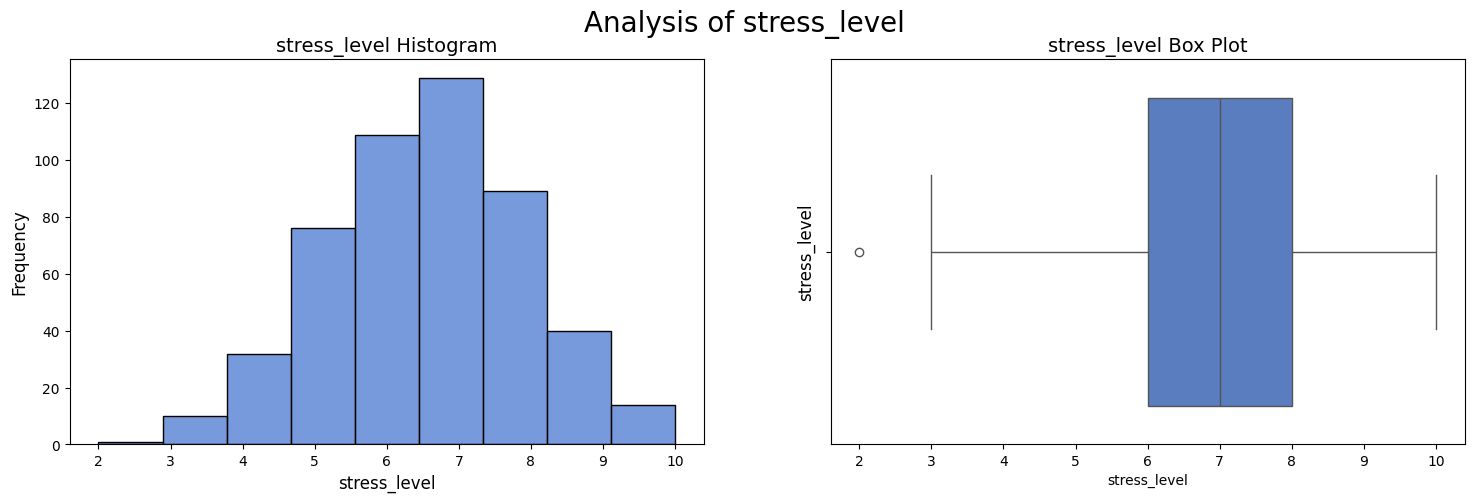

Skewness of the data in days_without_social_media is:  0.07957343733751697


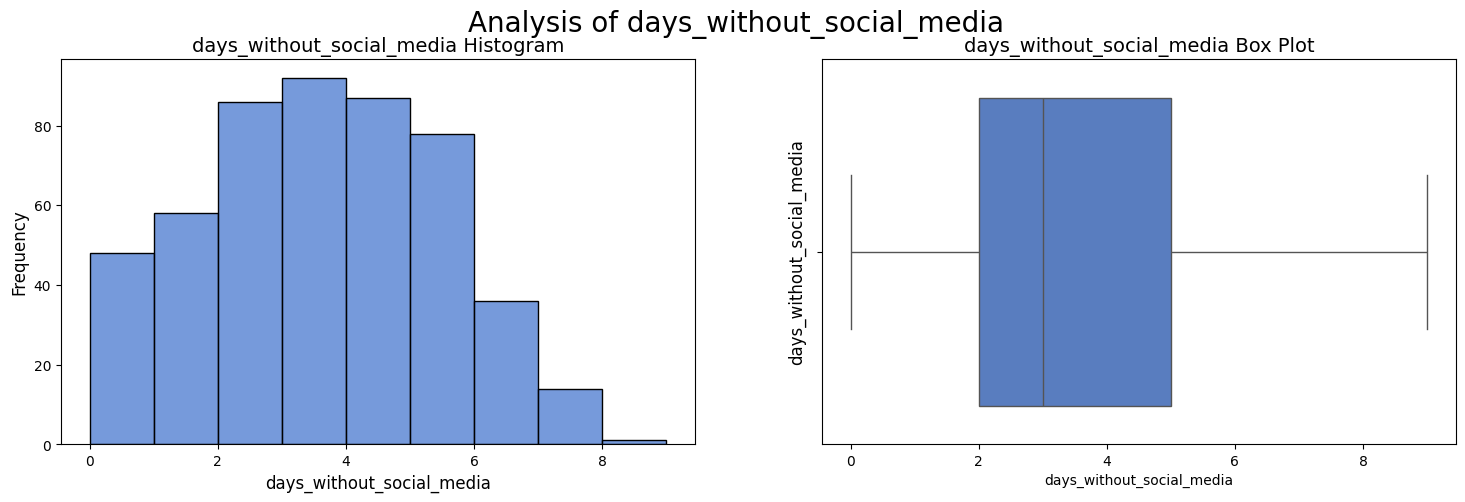

Skewness of the data in exercise_frequency(week) is:  0.23923386726752136


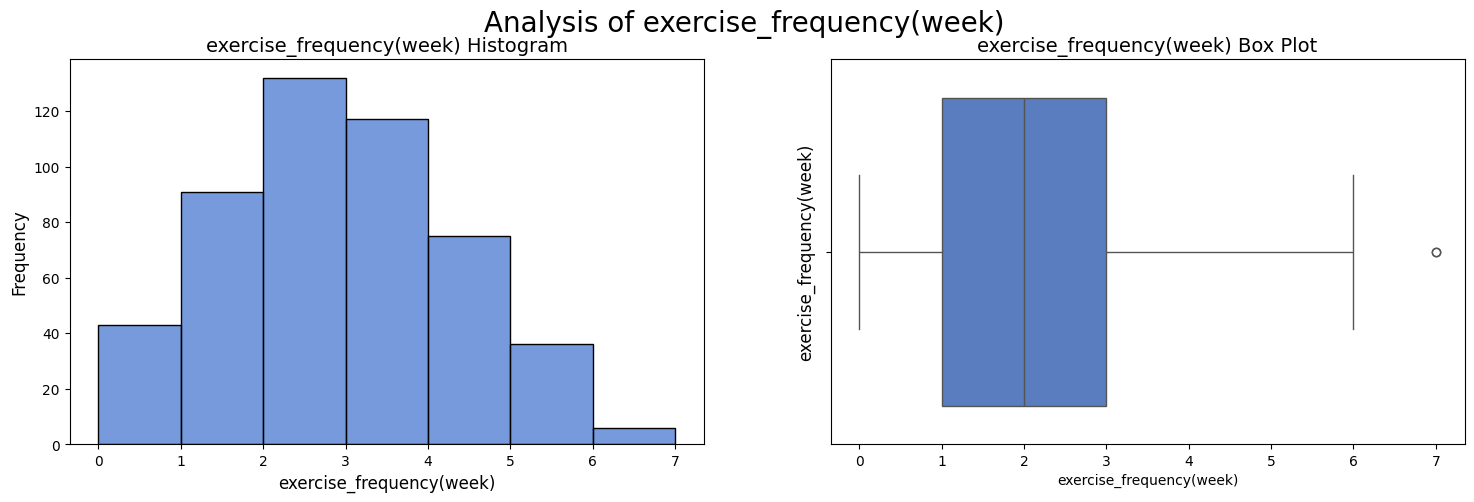

Skewness of the data in happiness_index is:  -0.6867337405186852


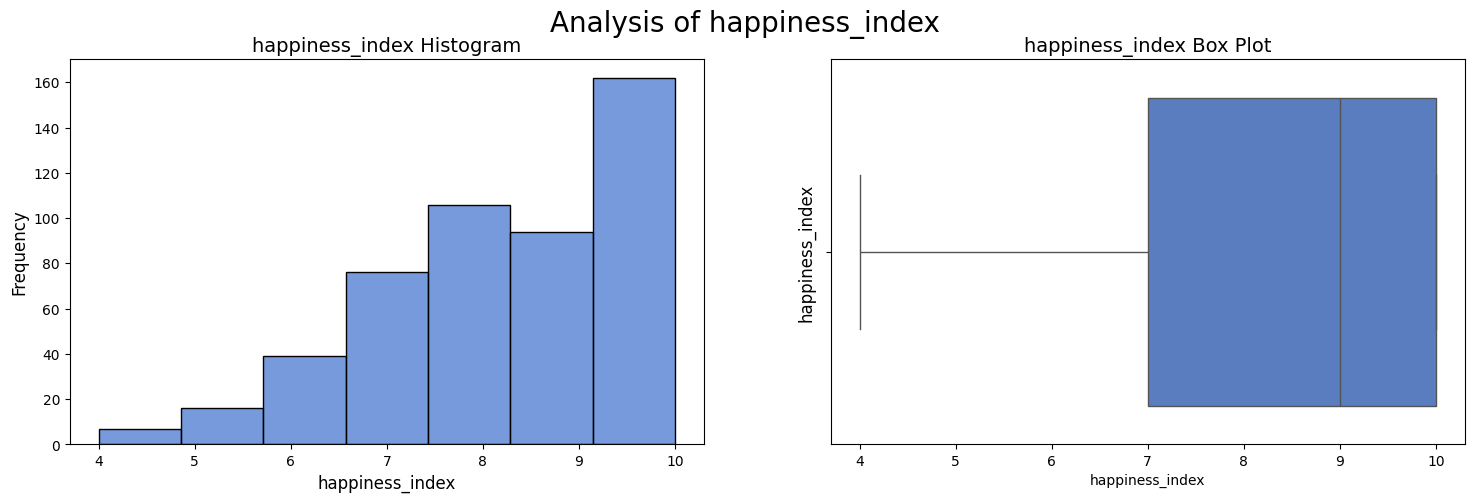

In [56]:
bins = [10, 9, 9, 9, 9, 7, 7]
numerical_plot(df[num_cols], bins)

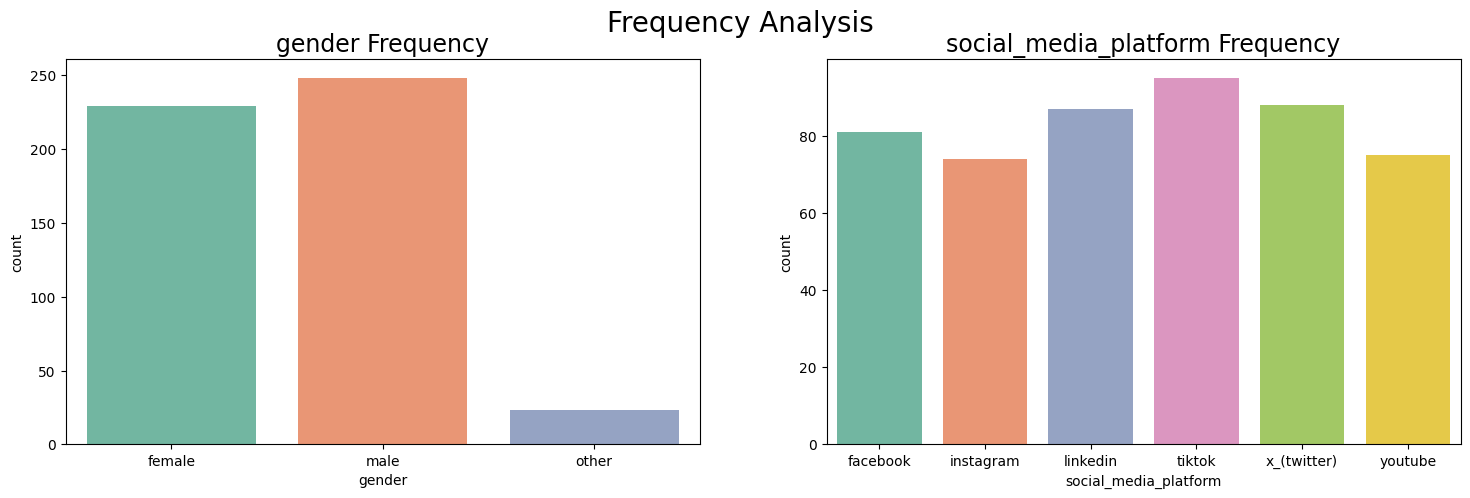

In [53]:
category_plot(df[cat_cols])

<Axes: xlabel='exercise_frequency(week)', ylabel='happiness_index'>

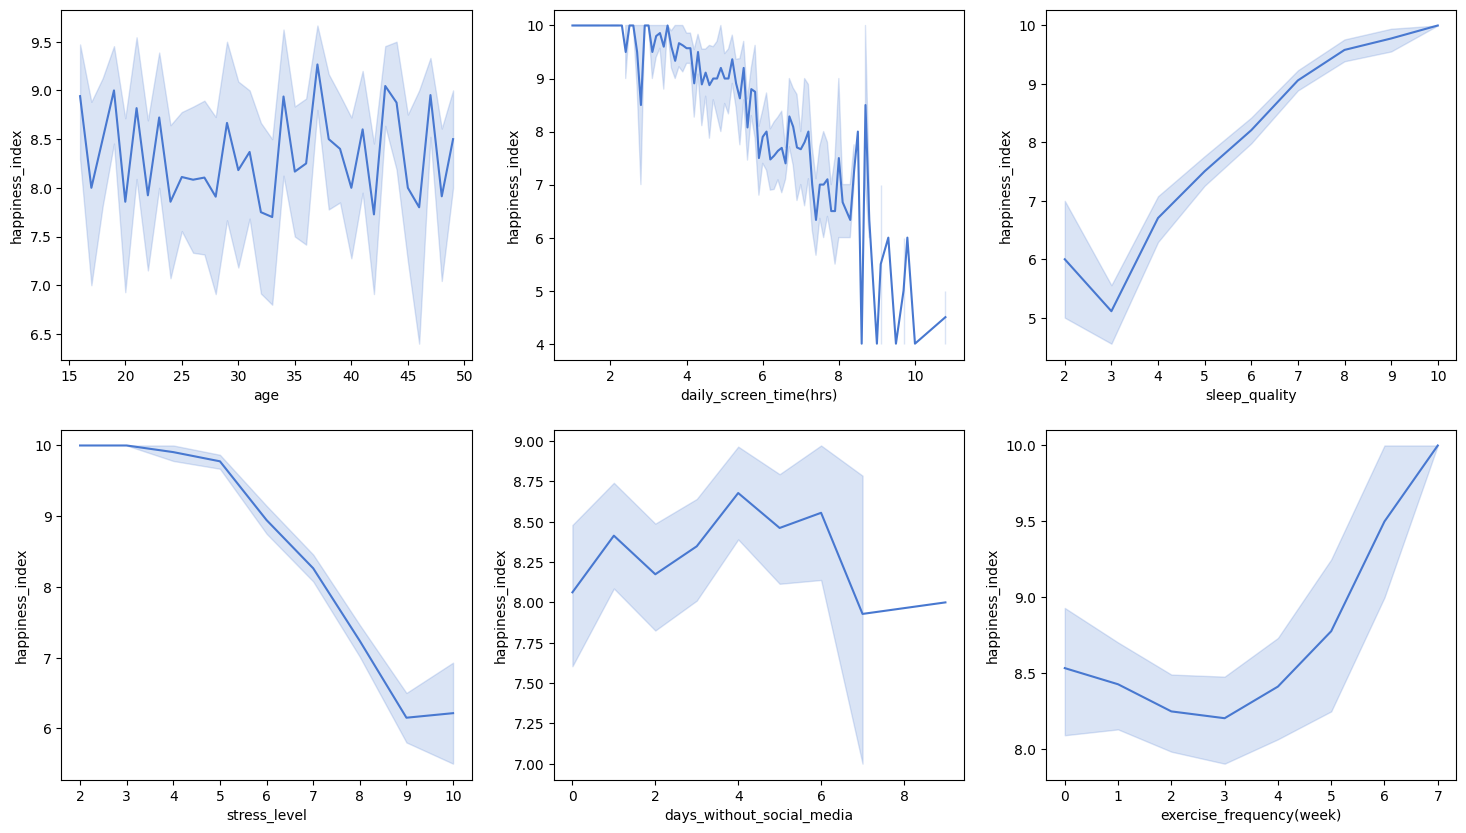

In [29]:
#Bivariate analysis of how happiness_index varies with numerical columns
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.lineplot(ax=axes[0, 0], data=df, x='age', y='happiness_index')
sns.lineplot(ax=axes[0, 1], data=df, x='daily_screen_time(hrs)', y='happiness_index')
sns.lineplot(ax=axes[0, 2], data=df, x='sleep_quality', y='happiness_index')
sns.lineplot(ax=axes[1, 0], data=df, x='stress_level', y='happiness_index')
sns.lineplot(ax=axes[1, 1], data=df, x='days_without_social_media', y='happiness_index')
sns.lineplot(ax=axes[1, 2], data=df, x='exercise_frequency(week)', y='happiness_index')

In [19]:
#Z-test for Exercise Frequency
from statsmodels.stats.weightstats import ztest

happiness_exercise0 = df[df['exercise_frequency(week)'] == 0]['happiness_index']
happiness_exercise1 = df[df['exercise_frequency(week)'] == 1]['happiness_index']
happiness_exercise2 = df[df['exercise_frequency(week)'] == 2]['happiness_index']
happiness_exercise3 = df[df['exercise_frequency(week)'] == 3]['happiness_index']
happ_exercise0 = happiness_exercise0.to_numpy()
happ_exercise1 = happiness_exercise1.to_numpy()
happ_exercise2 = happiness_exercise2.to_numpy()
happ_exercise3 = happiness_exercise3.to_numpy()

#Z-test between participants who dont exercise and those who exercise once a week. 
#Null hypothesis: there is no difference between the means of these groups

z_0and1, p_0and1 = ztest(happ_exercise0, happ_exercise1, value=0)
print('P-value for Z-test between participants who do not exercise and participants who exercise once a week: ', p_0and1)

#Z-test between participants who exercise once a week and those who exercise twice a week. 
#Null hypothesis: there is no difference between the means of these groups

z_1and2, p_1and2 = ztest(happ_exercise1, happ_exercise2, value=0)
print('P-value for Z-test between participants who exercise once a week and those who exercise twice a week: ', p_1and2)

#Z-test between participants who exercise twice a week and those who exercise 3 times a week. 
#Null hypothesis: there is no difference between the means of these groups

z_2and3, p_2and3 = ztest(happ_exercise2, happ_exercise3, value=0)
print('P-value for Z-test between participants who exercise twice a week and those who exercise 3 times a week: ', p_2and3)

P-value for Z-test between participants who do not exercise and participants who exercise once a week:  0.6873540304444479
P-value for Z-test between participants who exercise once a week and those who exercise twice a week:  0.3693397814879886
P-value for Z-test between participants who exercise twice a week and those who exercise 3 times a week:  0.8220532868235939


gender
male      0.496
female    0.458
other     0.046
Name: proportion, dtype: float64

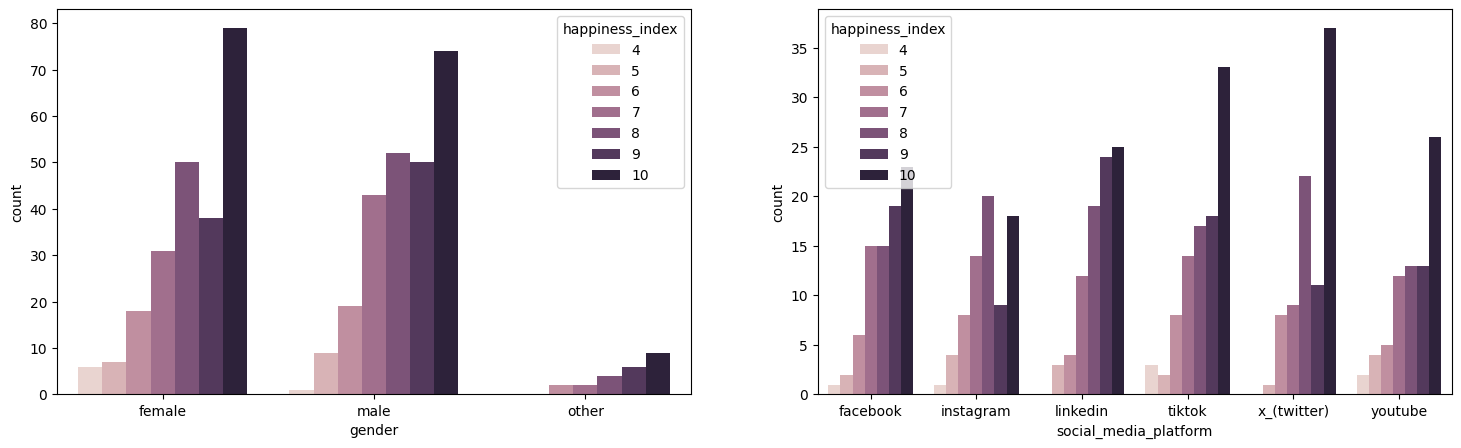

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
sns.countplot(ax=axes[0], x = 'gender', data = df, hue='happiness_index')
sns.countplot(ax=axes[1], x = 'social_media_platform', data = df, hue='happiness_index')
df['social_media_platform'].value_counts(normalize=True)

<Axes: >

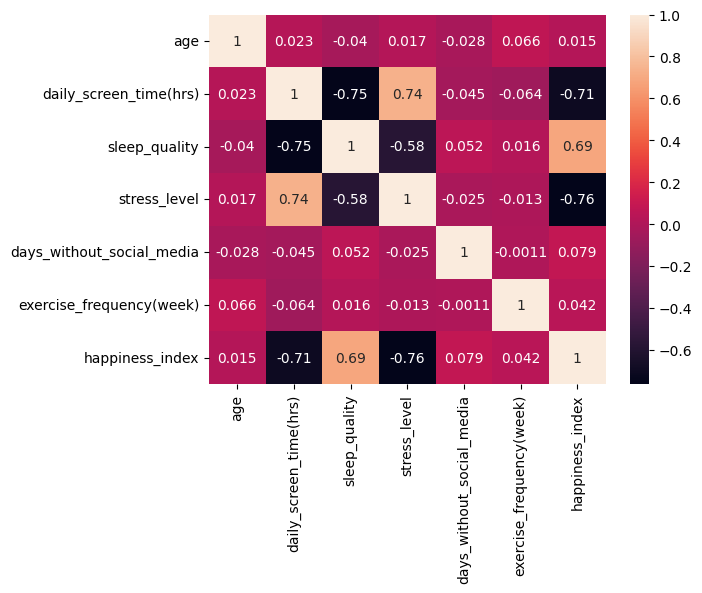

In [13]:
df_num = df.drop(cat_cols, axis=1)
corr = df_num.corr(method='spearman')
sns.heatmap(corr, annot=True, annot_kws={'size':10})

<Axes: xlabel='sleep_quality', ylabel='stress_level'>

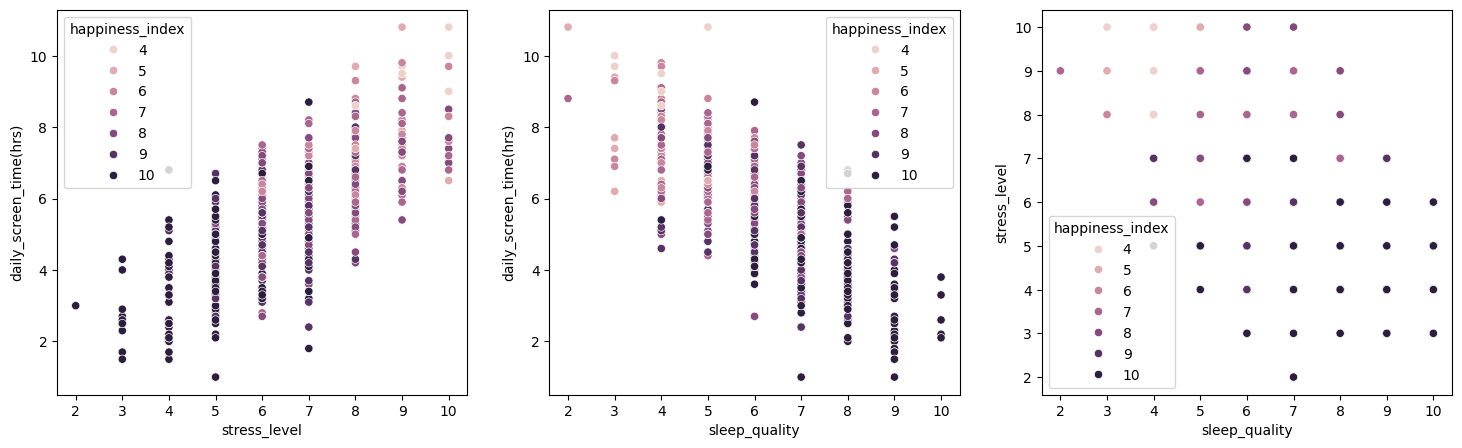

In [10]:
#Multivariate analysis between stress level, sleep quality and daily screen time
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(ax=axes[0], data=df, x='stress_level', y='daily_screen_time(hrs)', hue='happiness_index')
sns.scatterplot(ax=axes[1], data=df, y='daily_screen_time(hrs)', x='sleep_quality', hue='happiness_index')
sns.scatterplot(ax=axes[2], data=df, x='sleep_quality', y='stress_level', hue='happiness_index')

<Axes: xlabel='exercise_frequency(week)', ylabel='happiness_index'>

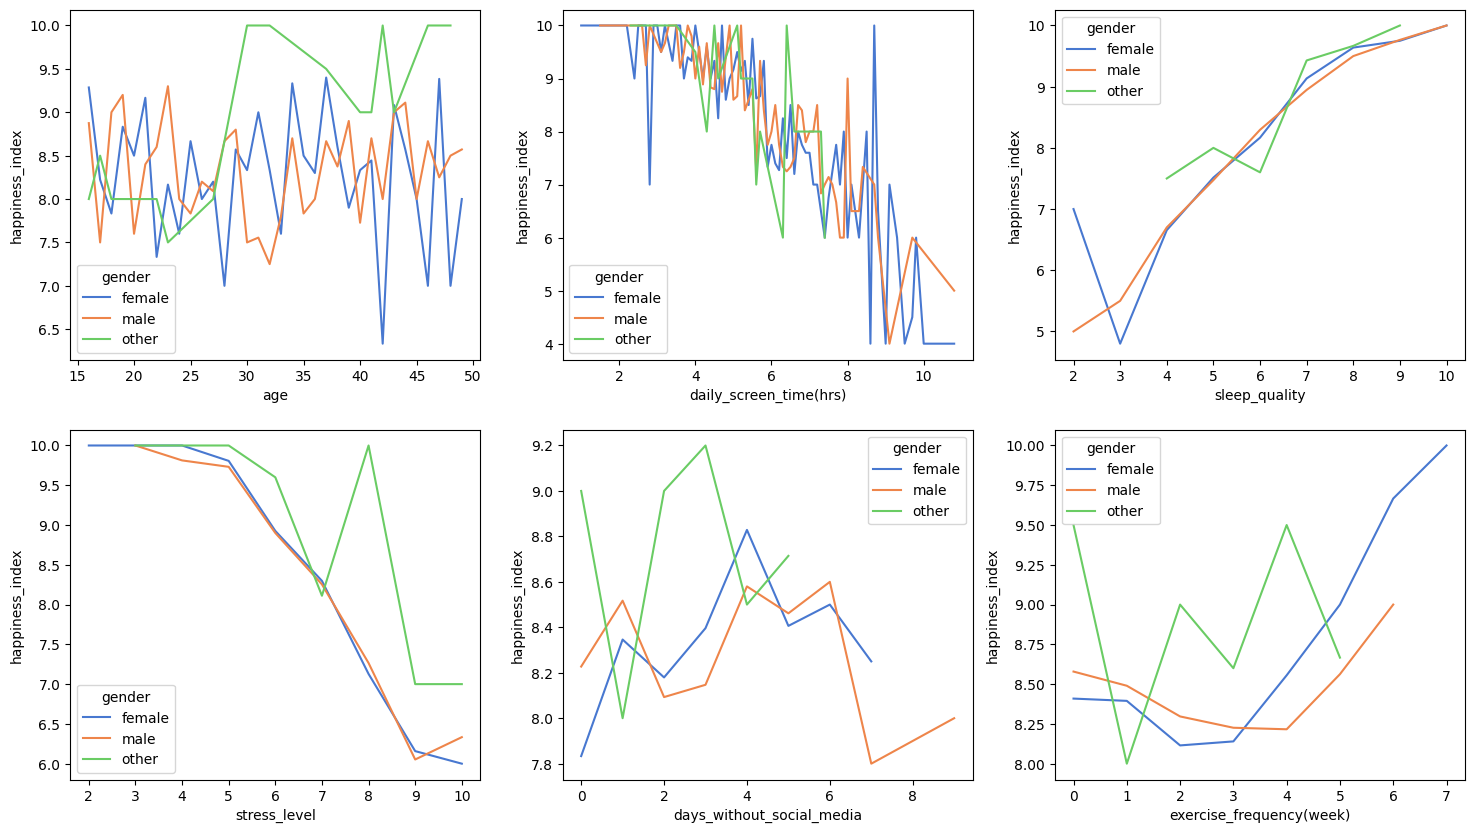

In [14]:
#Multivariate analysis with gender
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.lineplot(ax=axes[0, 0], data=df, x='age', y='happiness_index', hue='gender', errorbar=None)
sns.lineplot(ax=axes[0, 1], data=df, x='daily_screen_time(hrs)', y='happiness_index', hue='gender', errorbar=None)
sns.lineplot(ax=axes[0, 2], data=df, x='sleep_quality', y='happiness_index', hue='gender', errorbar=None)
sns.lineplot(ax=axes[1, 0], data=df, x='stress_level', y='happiness_index', hue='gender', errorbar=None)
sns.lineplot(ax=axes[1, 1], data=df, x='days_without_social_media', y='happiness_index', hue='gender', errorbar=None)
sns.lineplot(ax=axes[1, 2], data=df, x='exercise_frequency(week)', y='happiness_index', hue='gender', errorbar=None)

<Axes: xlabel='exercise_frequency(week)', ylabel='happiness_index'>

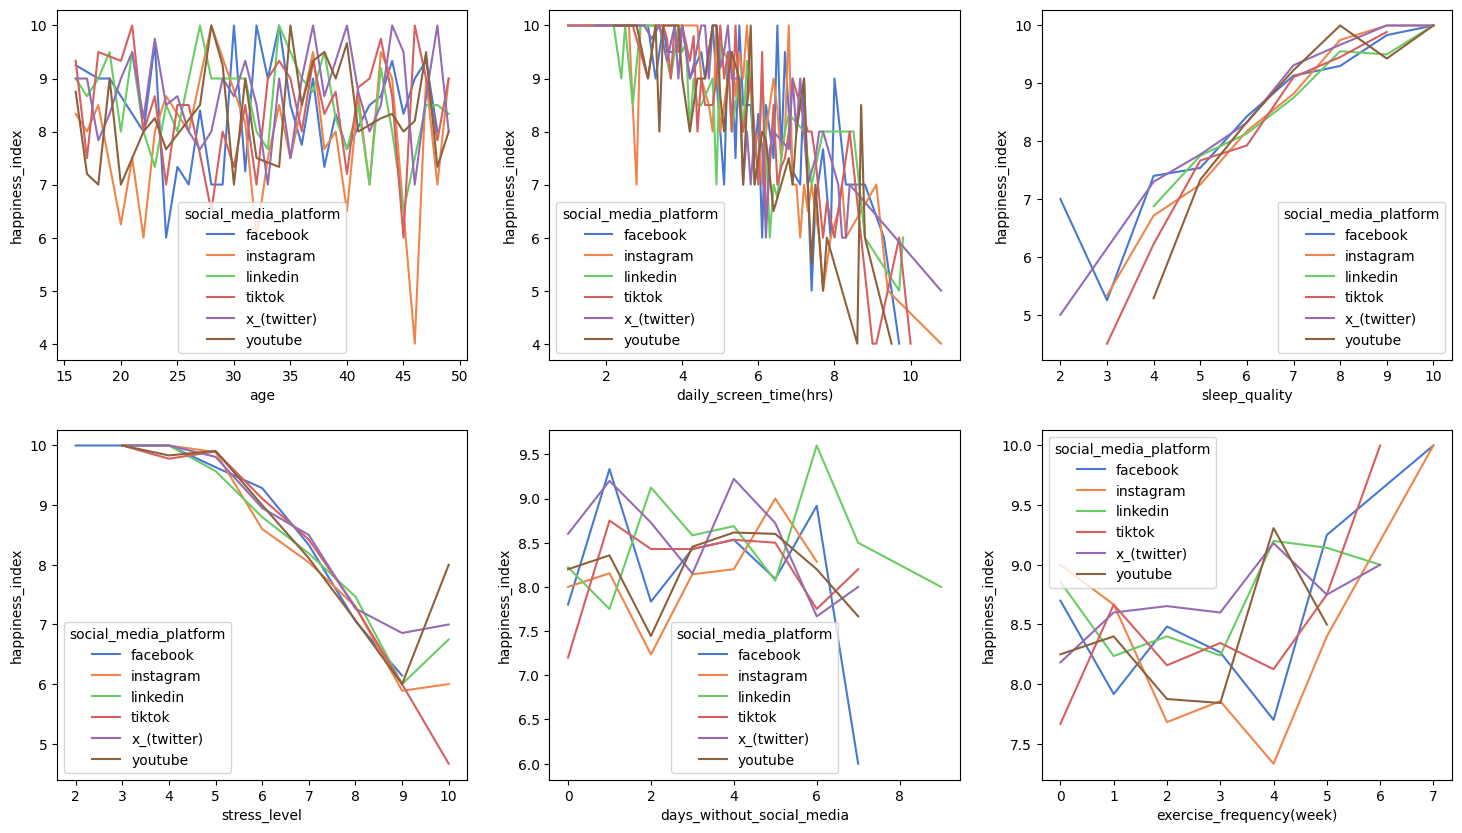

In [19]:
#Multivariate analysis with social media platform
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.lineplot(ax=axes[0, 0], data=df, x='age', y='happiness_index', hue='social_media_platform', errorbar=None)
sns.lineplot(ax=axes[0, 1], data=df, x='daily_screen_time(hrs)', y='happiness_index', hue='social_media_platform', errorbar=None)
sns.lineplot(ax=axes[0, 2], data=df, x='sleep_quality', y='happiness_index', hue='social_media_platform', errorbar=None)
sns.lineplot(ax=axes[1, 0], data=df, x='stress_level', y='happiness_index', hue='social_media_platform', errorbar=None)
sns.lineplot(ax=axes[1, 1], data=df, x='days_without_social_media', y='happiness_index', hue='social_media_platform', errorbar=None)
sns.lineplot(ax=axes[1, 2], data=df, x='exercise_frequency(week)', y='happiness_index', hue='social_media_platform', errorbar=None)

<Axes: xlabel='exercise_frequency(week)', ylabel='happiness_index'>

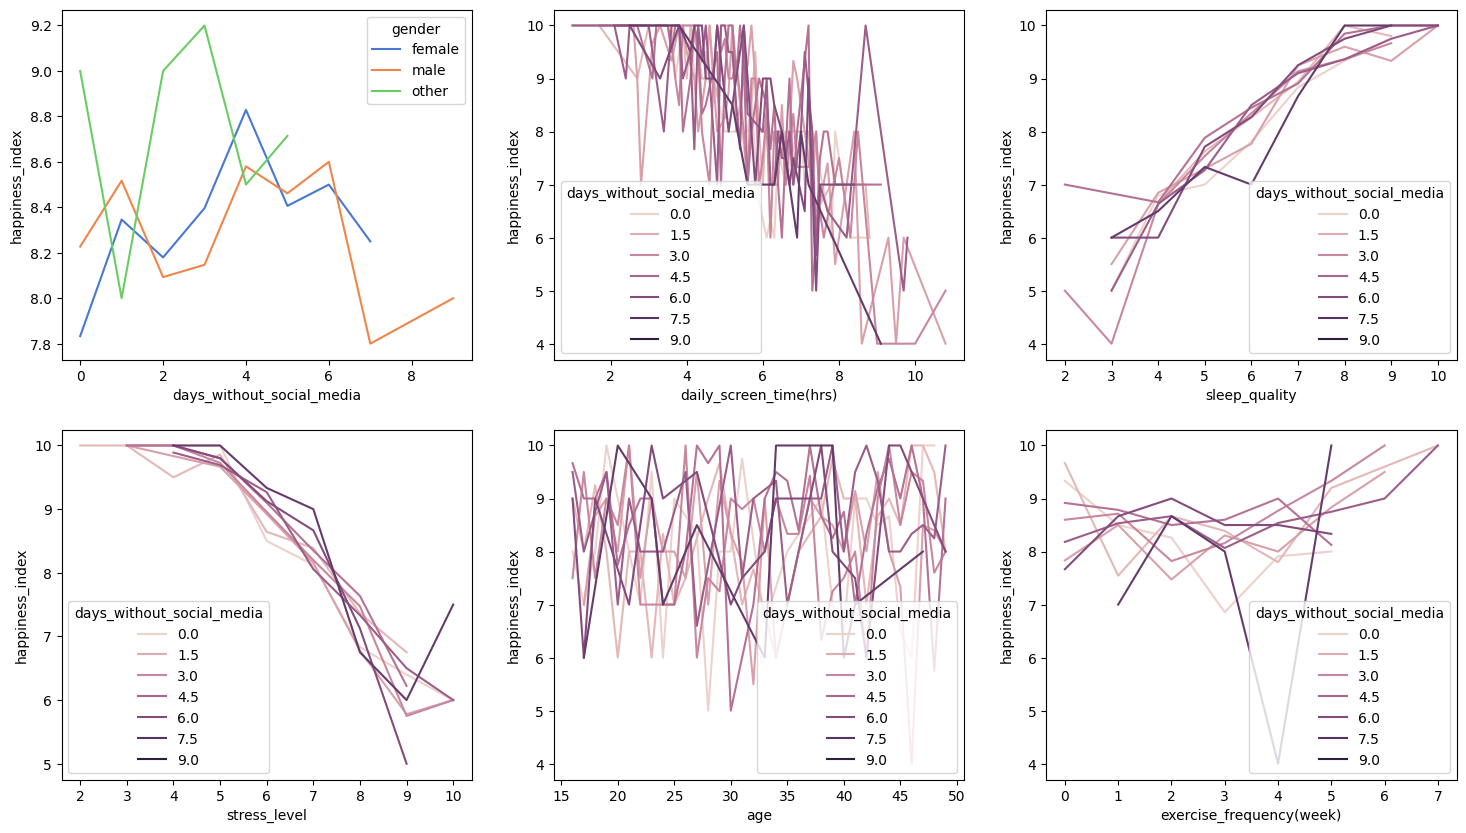

In [25]:
#Multivariate analysis with days without social media
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.lineplot(ax=axes[0, 0], data=df, x='days_without_social_media', y='happiness_index', hue='gender', errorbar=None)
sns.lineplot(ax=axes[0, 1], data=df, x='daily_screen_time(hrs)', y='happiness_index', hue='days_without_social_media', errorbar=None)
sns.lineplot(ax=axes[0, 2], data=df, x='sleep_quality', y='happiness_index', hue='days_without_social_media', errorbar=None)
sns.lineplot(ax=axes[1, 0], data=df, x='stress_level', y='happiness_index', hue='days_without_social_media', errorbar=None)
sns.lineplot(ax=axes[1, 1], data=df, x='age', y='happiness_index', hue='days_without_social_media', errorbar=None)
sns.lineplot(ax=axes[1, 2], data=df, x='exercise_frequency(week)', y='happiness_index', hue='days_without_social_media', errorbar=None)

<Axes: xlabel='exercise_frequency(week)', ylabel='age'>

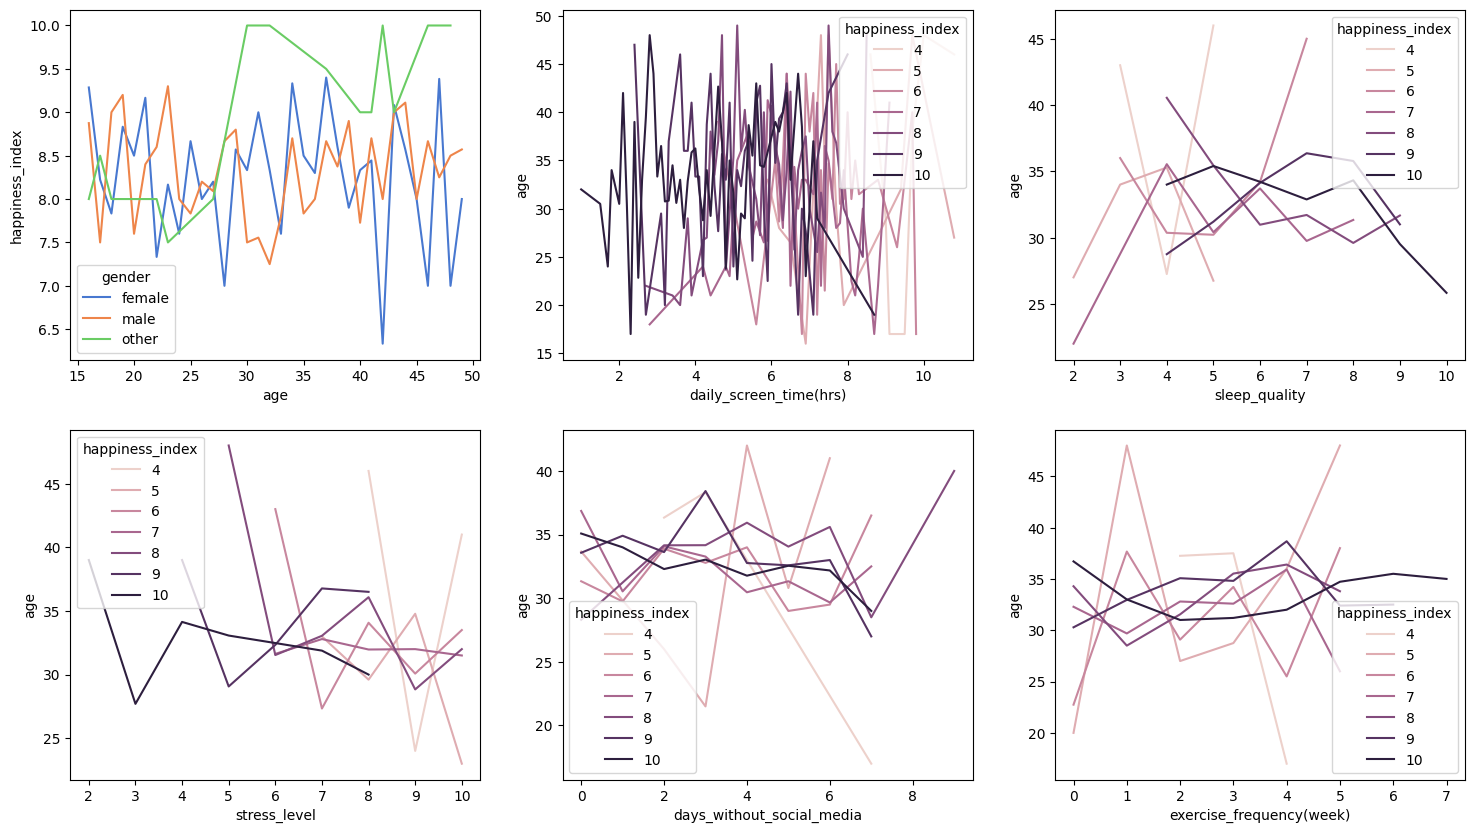

In [24]:
#Multivariate analysis with days without social media
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.lineplot(ax=axes[0, 0], data=df, x='age', y='happiness_index', hue='gender', errorbar=None)
sns.lineplot(ax=axes[0, 1], data=df, x='daily_screen_time(hrs)', y='age', hue='happiness_index', errorbar=None)
sns.lineplot(ax=axes[0, 2], data=df, x='sleep_quality', y='age', hue='happiness_index', errorbar=None)
sns.lineplot(ax=axes[1, 0], data=df, x='stress_level', y='age', hue='happiness_index', errorbar=None)
sns.lineplot(ax=axes[1, 1], data=df, x='days_without_social_media', y='age', hue='happiness_index', errorbar=None)
sns.lineplot(ax=axes[1, 2], data=df, x='exercise_frequency(week)', y='age', hue='happiness_index', errorbar=None)

## Label Encoding

In [48]:
df = pd.get_dummies(df, columns = ['gender'], dtype='int')
df.head()

,age,daily_screen_time(hrs),sleep_quality,stress_level,days_without_social_media,exercise_frequency(week),social_media_platform,happiness_index,gender_female,gender_male,gender_other
0,44,3.1,7.0,6.0,2.0,5,facebook,10.0,0,1,0
1,30,5.1,7.0,8.0,5.0,3,linkedin,10.0,0,0,1
2,23,7.4,6.0,7.0,1.0,3,youtube,6.0,0,0,1
3,36,5.7,7.0,8.0,1.0,1,tiktok,8.0,1,0,0
4,34,7.0,4.0,7.0,5.0,1,x_(twitter),8.0,1,0,0


## Data split

In [53]:
X = df.drop(['age','happiness_index', 'days_without_social_media', 'social_media_platform'], axis=1)
y = df[['happiness_index']]

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_arr = np.array(X)
y_arr = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X_arr, y_arr, test_size = 0.3, random_state = 778, stratify=y)

smote = SMOTE(random_state=2, k_neighbors = 1)

X_train, y_train = smote.fit_resample(X_train, y_train)
X_test, y_test = smote.fit_resample(X_test, y_test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=True, random_state=778, stratify=y)

## Model Training

In [58]:
#Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
cv = cross_val_score(lin_reg, X_train, y_train, cv=7, scoring='neg_root_mean_squared_error')
print('NRMSE: {}'.format(round(cv.mean(), 4)))
print('RMSE: {}'.format((round(np.sqrt(-cv.mean()), 4))))

NRMSE: -0.918
RMSE: 0.9581


In [70]:
#Linear Regression with Ridge regularization model
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid=[{'alpha': [0.1, 0.5, 1, 2, 2.5]}]
ridge = Ridge()
grid = GridSearchCV(ridge, param_grid, cv=7, scoring='neg_root_mean_squared_error')
grid.fit(X_train, y_train)

print('NRMSE: {}'.format(round(grid.best_score_, 4)))
print('RMSE: {}'.format((round(np.sqrt(-grid.best_score_), 4))))
print('Best alpha: {}'.format(grid.best_params_))

NRMSE: -0.9176
RMSE: 0.9579
Best alpha: {'alpha': 2.5}


In [60]:
#Linear Regression with Lasso regularization model
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

param_grid=[{'alpha': [0.01,0.05, 0.1, 0.5]}]
lasso = Lasso()
grid = GridSearchCV(lasso, param_grid, cv=7, scoring='neg_root_mean_squared_error')
grid.fit(X_train, y_train)

print('NRMSE: {}'.format(round(grid.best_score_, 4)))
print('RMSE: {}'.format((round(np.sqrt(-grid.best_score_), 4))))
print('Best alpha: {}'.format(grid.best_params_))

NRMSE: -0.9135
RMSE: 0.9557
Best alpha: {'alpha': 0.05}


In [71]:
#Decision Tree Regressor model
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid=[{'max_depth': [5, 10, 20, 25, 30, 35],
            'min_samples_split':[0.001, 0.005, 0.01, 0.1, 0.3]}]
tree = DecisionTreeRegressor()
grid = GridSearchCV(tree, param_grid, cv=7, scoring='neg_root_mean_squared_error')
grid.fit(X_train, y_train)

print('NRMSE: {}'.format(round(grid.best_score_, 4)))
print('RMSE: {}'.format((round(np.sqrt(-grid.best_score_), 4))))
print('Best max_depth: {}'.format(grid.best_params_))

NRMSE: -0.9931
RMSE: 0.9965
Best max_depth: {'max_depth': 20, 'min_samples_split': 0.1}


In [75]:
#Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid=[{'max_depth': [5, 10, 20],
    'n_estimators':[50, 100, 150],
    'min_samples_split':[0.05, 0.1, 0.2]}]
forest = RandomForestRegressor()
grid = GridSearchCV(forest, param_grid, cv=7, scoring='neg_root_mean_squared_error')
grid.fit(X_train, y_train.values.ravel())

print('NRMSE: {}'.format(round(grid.best_score_, 4)))
print('RMSE: {}'.format((round(np.sqrt(-grid.best_score_), 4))))
print('Best params: {}'.format(grid.best_params_))

NRMSE: -0.9039
RMSE: 0.9507
Best params: {'max_depth': 10, 'min_samples_split': 0.1, 'n_estimators': 100}


In [74]:
#Gradient Boosting Regressor model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

param_grid=[{'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators':[5, 10, 40, 50, 60, 70]}]
boost = GradientBoostingRegressor()
grid = GridSearchCV(boost, param_grid, cv=7, scoring='neg_root_mean_squared_error')
grid.fit(X_train, y_train.values.ravel())

print('NRMSE: {}'.format(round(grid.best_score_, 4)))
print('RMSE: {}'.format((round(np.sqrt(-grid.best_score_), 4))))
print('Best params: {}'.format(grid.best_params_))

NRMSE: -0.9186
RMSE: 0.9584
Best params: {'learning_rate': 0.05, 'n_estimators': 50}


# Hyperparameter fine-tuning

In [83]:
#Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid=[{'max_depth': [3, 5, 7, 9,11],
    'n_estimators':[100, 105, 110, 115, 120],
    'min_samples_split':[0.07, 0.1, 0.12]}]
best = RandomForestRegressor()
grid = GridSearchCV(best, param_grid, cv=7, scoring='neg_root_mean_squared_error')
grid.fit(X_train, y_train.values.ravel())

print('NRMSE: {}'.format(round(grid.best_score_, 4)))
print('RMSE: {}'.format((round(np.sqrt(-grid.best_score_), 4))))
print('Best params: {}'.format(grid.best_params_))

NRMSE: -0.903
RMSE: 0.9503
Best params: {'max_depth': 5, 'min_samples_split': 0.1, 'n_estimators': 105}


In [86]:
from sklearn.metrics import root_mean_squared_error as RMSE

best = RandomForestRegressor(max_depth = 5, min_samples_split=0.1, n_estimators=105)
best.fit(X_train, y_train.values.ravel())
pred = best.predict(X_test)
rmse = RMSE(y_test, pred)
print('RMSE on the test set: {}'.format(round(rmse,4)))

RMSE on the test set: 0.8953
